**Project Overview**
This project involves creating a Personal Finance Tracker and Budget Planner using Python. It is designed to teach fundamental Python skills while building a practical application. Users will be able to track expenses and income, set budgets, and analyze their financial habits.

## Steps to Build the Project
1. **Set Up Basic Structure**:
   - Start with a Python script and define a menu system for user interaction.

2. **Transaction Recording Feature**:
   - Implement adding and storing transactions with all necessary details.

3. **Transaction Viewing Feature**:
   - Create functionality to view the transaction history with various filters.

4. **Budget Setup Feature**:
   - Allow users to create and edit a monthly budget for different categories.

5. **Budget Analysis Feature**:
   - Develop a system to compare expenses against the budget and provide insights.

6. **Testing and Refinement**:
   - Continuously test each feature for functionality and user experience improvements.

7. **Data Persistence (Optional)**:
   - Add features to save and load data to and from a file.

8. **Final Review and Testing**:
   - Conduct a thorough review and testing of the application to ensure reliability and usability.




In [ ]:
import json
import matplotlib.pyplot as plt

# Initialize variables
income = 0.0
expenses = []
savings = 0.0


In [ ]:
# Load transactions data from file
def load_data():
    global income, expenses, savings
    try:
        with open('transactions.json', 'r') as file:
            data = json.load(file)
            income = data.get('income', 0.0)
            expenses = data.get('expenses', [])
            savings = data.get('savings', 0.0)
    except FileNotFoundError:
        pass


In [ ]:
# Save transactions data to file
def save_data():
    global income, expenses, savings
    data = {
        'income': income,
        'expenses': expenses,
        'savings': savings
    }
    with open('transactions.json', 'w') as file:
        json.dump(data, file)


In [ ]:
# Add a transaction for income
def add_income():
    global income
    try:
        amount = float(input('Enter income amount: '))
        income += amount
        print(f'Income of {amount} added successfully!')
    except ValueError:
        print('Invalid amount! Please enter a valid number.')


In [ ]:
# Add a transaction for expense
def add_expense():
    global expenses
    description = input('Enter expense description: ')
    try:
        amount = float(input('Enter expense amount: '))
        category = input('Enter expense category: ')
        expense = {
            'description': description,
            'amount': amount,
            'category': category
        }
        expenses.append(expense)
        print('Expense added successfully!')
    except ValueError:
        print('Invalid amount! Please enter a valid number.')


In [ ]:
# Calculate savings
def calculate_savings():
    global income, expenses, savings
    savings = income - sum(expense['amount'] for expense in expenses)
    print(f'You have {savings} savings.')



In [ ]:
# Generate report of expenses by category
def generate_expense_report_category():
    global expenses
    categories = set(expense['category'] for expense in expenses)
    print('Available categories:', categories)
    category = input('Enter category: ')

    # Check if the category entered by the user exists in the expenses list
    if category not in categories:
        print(f'No expenses found for category: {category}')
        return

    total_amount = sum(expense['amount'] for expense in expenses if expense['category'] == category)
    print(f'You have spent {total_amount} on {category}')


In [ ]:
# Generate a pie chart of expenses by category
def generate_expense_chart():
    global expenses
    categories = set(expense['category'] for expense in expenses)
    category_expenses = {category: 0.0 for category in categories}
    for expense in expenses:
        category_expenses[expense['category']] += expense['amount']

    labels = category_expenses.keys()
    values = category_expenses.values()

    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title('Expenses by Category')
    plt.axis('equal')
    plt.ion()
    plt.show()


========== Welcome to the Personal Finance Tracker!! ============
1. Add income
2. Add expense
3. Calculate savings
4. Generate expense report by category
5. Generate expense chart
6. Exit
Enter your choice (1-6): 1
Enter income amount: 20000
Income of 20000.0 added successfully!
========== Welcome to the Personal Finance Tracker!! ============
1. Add income
2. Add expense
3. Calculate savings
4. Generate expense report by category
5. Generate expense chart
6. Exit
Enter your choice (1-6): 1
Enter income amount: 300000
Income of 300000.0 added successfully!
========== Welcome to the Personal Finance Tracker!! ============
1. Add income
2. Add expense
3. Calculate savings
4. Generate expense report by category
5. Generate expense chart
6. Exit
Enter your choice (1-6): 1
Enter income amount: 50000
Income of 50000.0 added successfully!
========== Welcome to the Personal Finance Tracker!! ============
1. Add income
2. Add expense
3. Calculate savings
4. Generate expense report by category


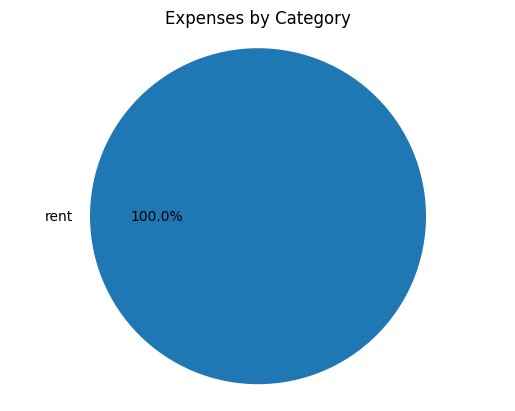

========== Welcome to the Personal Finance Tracker!! ============
1. Add income
2. Add expense
3. Calculate savings
4. Generate expense report by category
5. Generate expense chart
6. Exit
Enter your choice (1-6): 6
Thank you for using the tracker!


In [ ]:
# Run the program
def main():
    load_data()

    while True:
        print('''========== Welcome to the Personal Finance Tracker!! ============''')
        print("1. Add income")
        print("2. Add expense")
        print("3. Calculate savings")
        print("4. Generate expense report by category")
        print("5. Generate expense chart")
        print("6. Exit")

        try:
            choice = int(input('Enter your choice (1-6): '))
            if choice == 1:
                add_income()
            elif choice == 2:
                add_expense()
            elif choice == 3:
                calculate_savings()
            elif choice == 4:
                generate_expense_report_category()
            elif choice == 5:
                generate_expense_chart()
            elif choice == 6:
                save_data()
                print("Thank you for using the tracker!")
                break
            else:
                print('Invalid choice! Try again with a valid choice.')
        except ValueError:
            print('Invalid input! Please enter a valid integer choice.')

if __name__ == '__main__':
    main()
